In [2]:
#importing the required libraries
import math
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import pandas_datareader as pd
df=pd.DataReader("AAPL",data_source='yahoo',start='2020-11-17',end='2022-11-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,118.873009
2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,117.973808
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,116.629929
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,117.232704
2020-11-20,118.769997,117.290001,118.639999,117.339996,73604300.0,115.948120
...,...,...,...,...,...,...
2022-11-11,150.009995,144.369995,145.820007,149.699997,93903800.0,149.699997
2022-11-14,150.279999,147.429993,148.970001,148.279999,73374100.0,148.279999
2022-11-15,153.589996,148.559998,152.220001,150.039993,89868300.0,150.039993


In [4]:
#getting the number of rows and columns
df.shape

(506, 6)

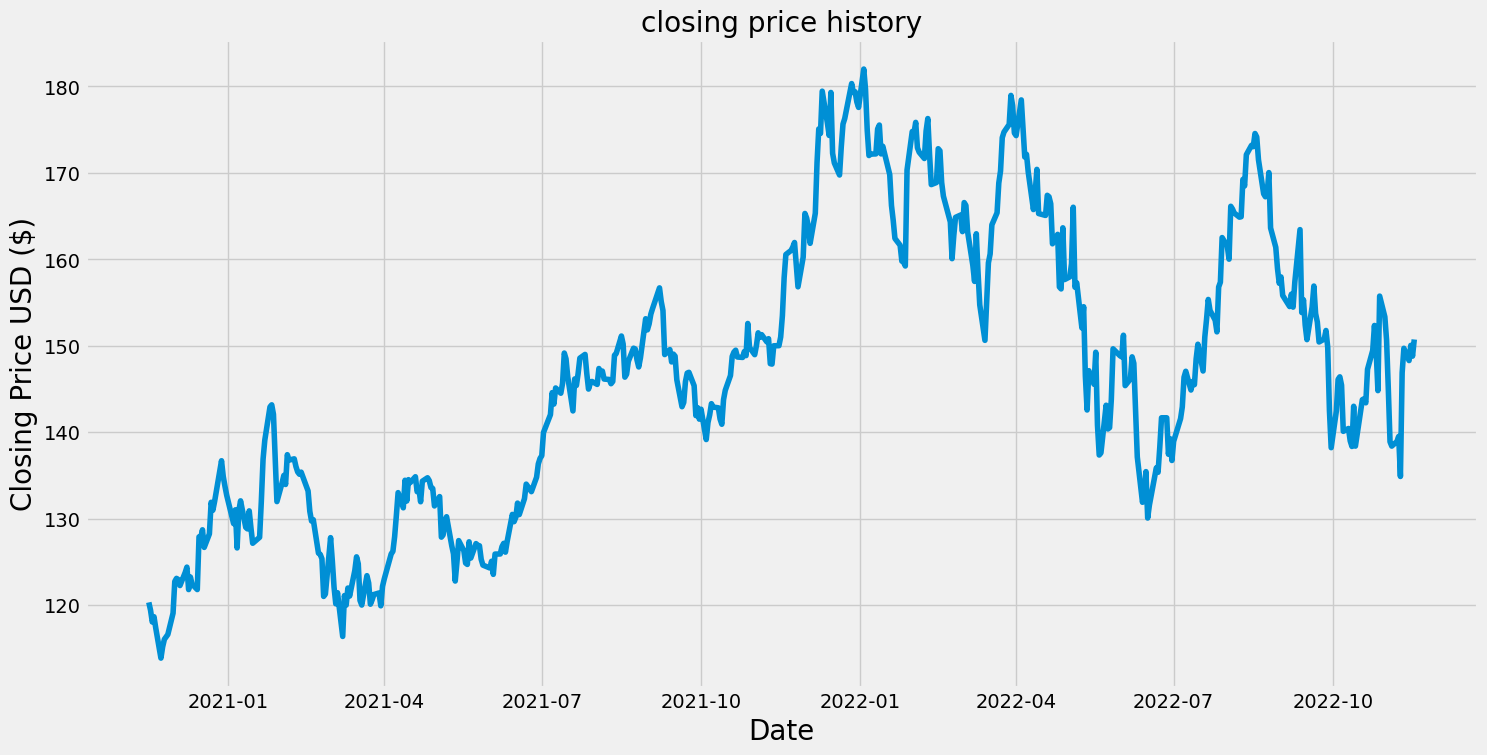

In [5]:
#visualizing the closing price
plt.figure(figsize=(16,8))
plt.title("closing price history")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Closing Price USD ($)',fontsize=20)
plt.show()

In [6]:
#create a new dataframe with only close column
data=df.filter(['Close'])
#dataframe into numpy array
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

405

In [7]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.09463035],
       [0.08127936],
       [0.0613263 ],
       [0.07027584],
       [0.05120302],
       [0.        ],
       [0.01936619],
       [0.03198357],
       [0.0401995 ],
       [0.07629115],
       [0.13013502],
       [0.13541672],
       [0.13336274],
       [0.12323947],
       [0.14524651],
       [0.15448943],
       [0.11634391],
       [0.13776408],
       [0.12558694],
       [0.11634391],
       [0.2058392 ],
       [0.20481221],
       [0.21786971],
       [0.18794023],
       [0.21097415],
       [0.26452476],
       [0.25102713],
       [0.26584513],
       [0.33509397],
       [0.30839199],
       [0.29152001],
       [0.27640852],
       [0.22828647],
       [0.25176052],
       [0.18705987],
       [0.25044015],
       [0.26701886],
       [0.22197767],
       [0.21933693],
       [0.25000003],
       [0.22095079],
       [0.19498242],
       [0.20510569],
       [0.26672537],
       [0.33773471],
       [0.37001189],
       [0.4264965 ],
       [0.430

In [8]:
#creating the training dataset
train_data=scaled_data[0:training_data_len,:]
#spliting tha train and test dataset
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.09463035, 0.08127936, 0.0613263 , 0.07027584, 0.05120302,
       0.        , 0.01936619, 0.03198357, 0.0401995 , 0.07629115,
       0.13013502, 0.13541672, 0.13336274, 0.12323947, 0.14524651,
       0.15448943, 0.11634391, 0.13776408, 0.12558694, 0.11634391,
       0.2058392 , 0.20481221, 0.21786971, 0.18794023, 0.21097415,
       0.26452476, 0.25102713, 0.26584513, 0.33509397, 0.30839199,
       0.29152001, 0.27640852, 0.22828647, 0.25176052, 0.18705987,
       0.25044015, 0.26701886, 0.22197767, 0.21933693, 0.25000003,
       0.22095079, 0.19498242, 0.20510569, 0.26672537, 0.33773471,
       0.37001189, 0.4264965 , 0.43001771, 0.41387912, 0.34096243,
       0.26569849, 0.29768196, 0.3101527 , 0.29474773, 0.34536388,
       0.33612085, 0.33832169, 0.32511733, 0.31602116, 0.31220668])]
[0.3157276686568089]

[array([0.09463035, 0.08127936, 0.0613263 , 0.07027584, 0.05120302,
       0.        , 0.01936619, 0.03198357, 0.0401995 , 0.07629115,
       0.13013502, 0.13541672, 0.133

In [9]:
#convert the x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [10]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(345, 60, 1)

In [11]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(1))

In [12]:
#complie the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [13]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

345/345 [==============================] - 6s 11ms/step - loss: 0.0127


In [14]:
#create the test data set
#cretae a new array for the testing values
test_data=scaled_data[training_data_len-60:,:]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [16]:
#reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 9ms/step


In [18]:
#get the root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.4732909249787283

C:\Users\krish\AppData\Local\Temp\ipykernel_19844\4233764843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


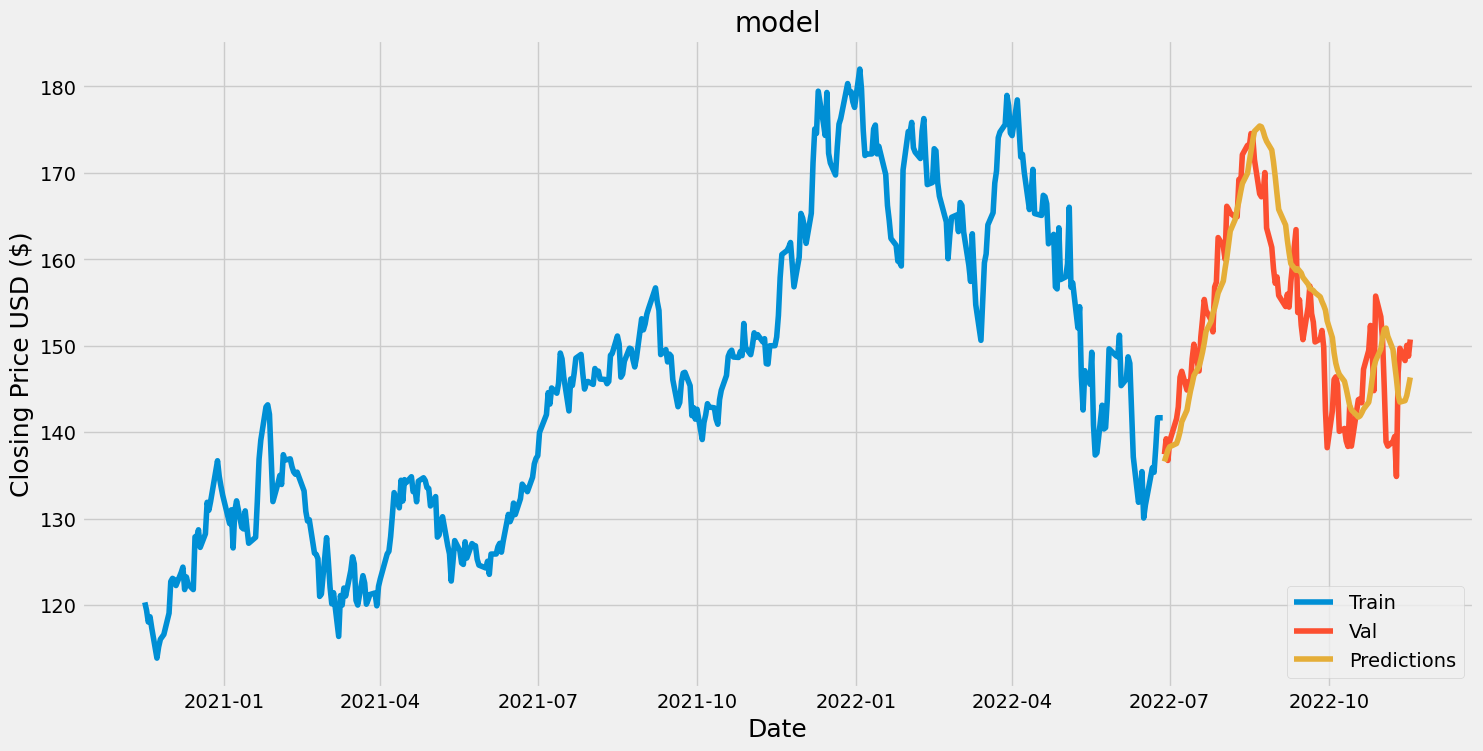

In [19]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel("Closing Price USD ($)",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","predictions"]])
plt.legend(["Train","Val","Predictions"],loc="lower right")
plt.show()

In [20]:
#show the actual and predicted prices
valid

,Close,predictions
Date,,
2022-06-28,137.440002,136.605011
2022-06-29,139.229996,137.257645
2022-06-30,136.720001,137.918488
2022-07-01,138.929993,138.298065
2022-07-05,141.559998,138.682571
...,...,...
2022-11-11,149.699997,143.475723
2022-11-14,148.279999,143.639847
2022-11-15,150.039993,144.247299


In [22]:
#get the quote
apple_quote=web.DataReader("AAPL",data_source='yahoo',start='2012-01-01',end='2022-11-17')
#create a new dataframe
new_df=apple_quote.filter(["Close"])
last_60_days=new_df[-60:].values
last_60_days_scales=scaler.transform(last_60_days)
#create an empty list
x_test=[]
#append the last 60 days values
x_test.append(last_60_days_scales)
#convert the x_test dataset into a numpy array
x_test=np.array(x_test)
#reshape to 3D
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#fet the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 17ms/step
[[147.53258]]


In [24]:
apple_quote2=web.DataReader("AAPL",data_source='yahoo',start='2022-11-17',end='2022-11-17')
print(apple_quote2['Close'])

Date
2022-11-16    148.789993
2022-11-17    150.720001
Name: Close, dtype: float64
